First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


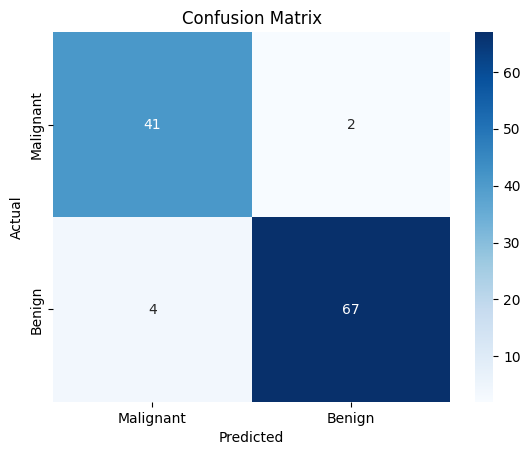

C:\Users\USER\AppData\Local\Temp\ipykernel_9824\3390075625.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


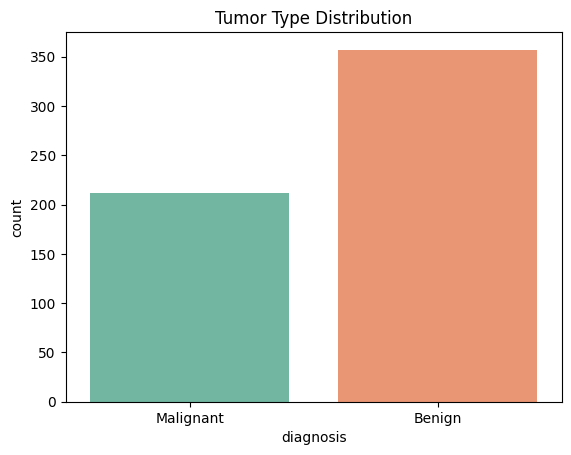

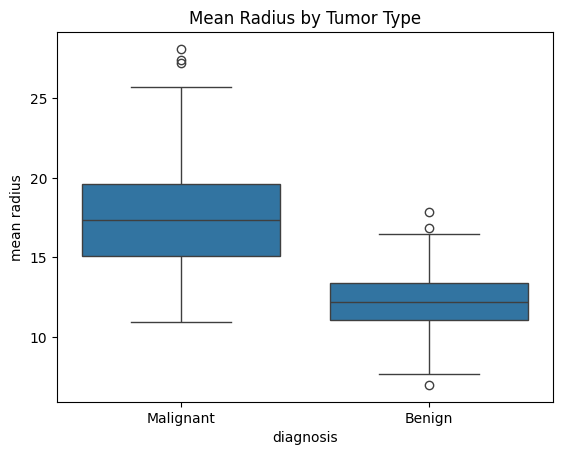

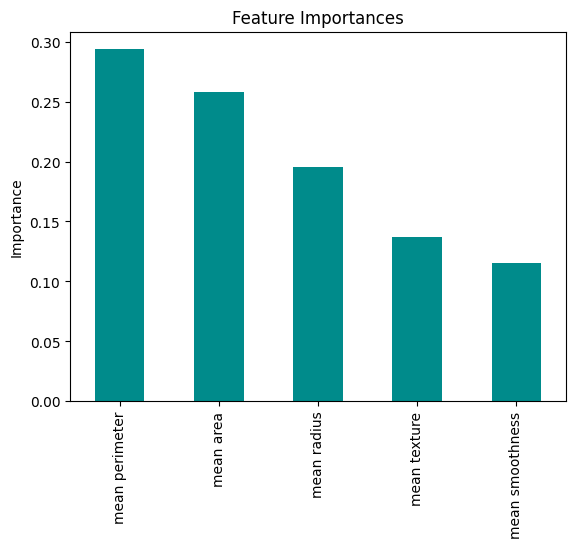

In [2]:
# Tumor Detection Project - Using Breast Cancer Dataset from sklearn

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load built-in breast cancer dataset
data = load_breast_cancer()

# Step 3: Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant, 1 = benign

# Step 4: Check the dataset
print("First 5 rows:")
print(df.head())
print("\nDataset shape:", df.shape)

# Step 5: Select relevant features and target
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X = df[features]
y = df['diagnosis']  # 0 = malignant, 1 = benign

# Step 6: Split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Step 10: Visualization - Tumor distribution
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Tumor Type Distribution')
plt.show()

# Step 11: Box plot - Mean Radius by Tumor Type
sns.boxplot(x='diagnosis', y='mean radius', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Mean Radius by Tumor Type')
plt.show()

# Step 12: Feature Importance
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
importances.plot(kind='bar', color='darkcyan')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()


First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \


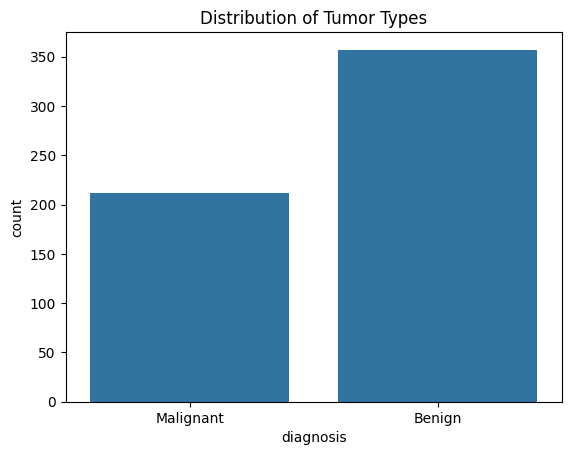

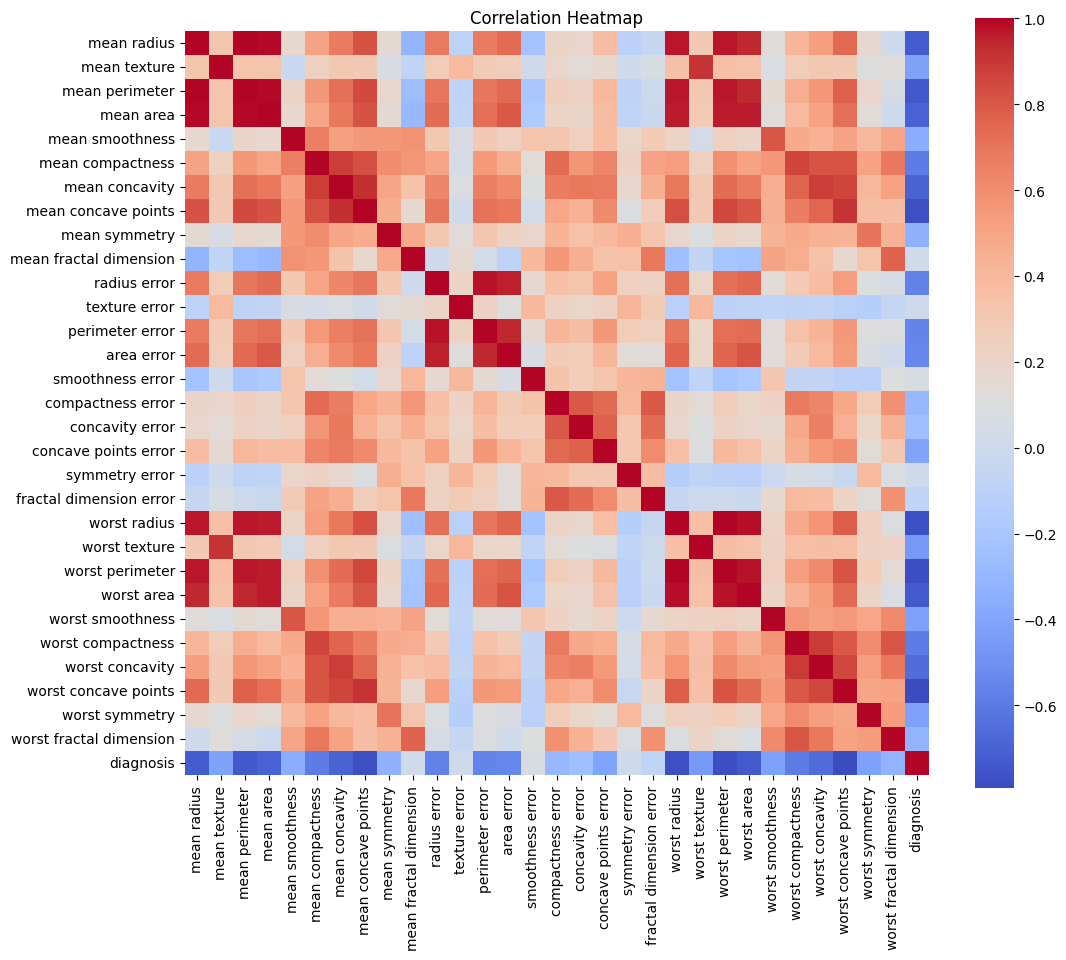


Accuracy: 94.74 %

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93        43
           1       0.97      0.94      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



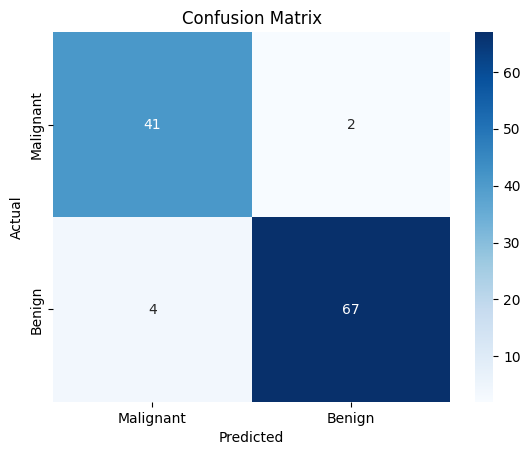

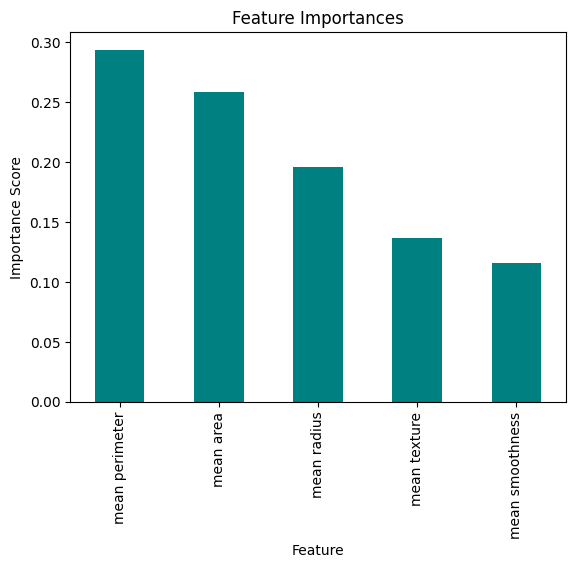

In [3]:
# Tumor Detection Project using built-in dataset from sklearn

# ========== 1. Import Required Libraries ==========
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ========== 2. Load Dataset ==========
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target  # 0 = malignant, 1 = benign

# ========== 3. Data Cleaning (already clean) ==========
print("First 5 rows:")
print(df.head())
print("\nMissing values:\n", df.isnull().sum())

# ========== 4. Exploratory Data Analysis ==========
# Distribution of tumor types
sns.countplot(x='diagnosis', data=df)
plt.xticks([0, 1], ['Malignant', 'Benign'])
plt.title('Distribution of Tumor Types')
plt.show()

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# ========== 5. Data Preprocessing ==========
# Select important features
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
X = df[features]
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ========== 6. Train-Test Split ==========
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ========== 7. Model Training ==========
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========== 8. Model Prediction & Evaluation ==========
y_pred = model.predict(X_test)

print("\nAccuracy:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ========== 9. Feature Importance Visualization ==========
feature_importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
feature_importances.plot(kind='bar', color='teal')
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Tumor_Detection.csv dataset
tumor_data = pd.read_csv('Tumor_Detection.csv')

# Print the first few rows to inspect the dataset
print("First few rows of the dataset:")
print(tumor_data.head())

# Remove irrelevant columns, for example, 'id' (assuming it's not needed)
tumor_data = tumor_data.drop(['id'], axis=1)

# Check for missing values
print("\nMissing values in each column:")
print(tumor_data.isnull().sum())

# Perform EDA: Distribution of diagnosis labels (malignant vs benign)
sns.countplot(x='diagnosis', data=tumor_data)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Tumor Types')
plt.show()

# Calculate and visualize correlations between features
corr_matrix = tumor_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocess the data by scaling features
scaler = StandardScaler()

# Standardizing selected features
tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']] = scaler.fit_transform(
    tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']])

# Verify the data after scaling
print("\nData after scaling:")
print(tumor_data.head())

# Feature selection: Define features (X) and target (y)
X = tumor_data.drop(['diagnosis'], axis=1)  # Features: all columns except 'diagnosis'
y = tumor_data['diagnosis']  # Target: 'diagnosis' (Malignant or Benign)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# Print the classification report for precision, recall, and F1-score
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Tumor_Detection.csv'

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Tumor_Detection.csv dataset
# Make sure to update the path based on where the dataset is located
tumor_data = pd.read_csv('path/to/your/Tumor_Detection.csv')  # <-- Update this line

# Print the first few rows to inspect the dataset
print("First few rows of the dataset:")
print(tumor_data.head())

# Remove irrelevant columns, for example, 'id' (assuming it's not needed)
tumor_data = tumor_data.drop(['id'], axis=1)

# Check for missing values
print("\nMissing values in each column:")
print(tumor_data.isnull().sum())

# Perform EDA: Distribution of diagnosis labels (malignant vs benign)
sns.countplot(x='diagnosis', data=tumor_data)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Tumor Types')
plt.show()

# Calculate and visualize correlations between features
corr_matrix = tumor_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocess the data by scaling features
scaler = StandardScaler()

# Standardizing selected features
tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']] = scaler.fit_transform(
    tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']])

# Verify the data after scaling
print("\nData after scaling:")
print(tumor_data.head())

# Feature selection: Define features (X) and target (y)
X = tumor_data.drop(['diagnosis'], axis=1)  # Features: all columns except 'diagnosis'
y = tumor_data['diagnosis']  # Target: 'diagnosis' (Malignant or Benign)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# Print the classification report for precision, recall, and F1-score
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/Tumor_Detection.csv'

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load Tumor_Detection.csv dataset
# If the dataset is in the same directory as the script, use the relative file name
tumor_data = pd.read_csv('Tumor_Detection.csv')  # Ensure the dataset is in the same directory

# Print the first few rows to inspect the dataset
print("First few rows of the dataset:")
print(tumor_data.head())

# Remove irrelevant columns, for example, 'id' (assuming it's not needed)
tumor_data = tumor_data.drop(['id'], axis=1)

# Check for missing values
print("\nMissing values in each column:")
print(tumor_data.isnull().sum())

# Perform EDA: Distribution of diagnosis labels (malignant vs benign)
sns.countplot(x='diagnosis', data=tumor_data)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Tumor Types')
plt.show()

# Calculate and visualize correlations between features
corr_matrix = tumor_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocess the data by scaling features
scaler = StandardScaler()

# Standardizing selected features
tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']] = scaler.fit_transform(
    tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']])

# Verify the data after scaling
print("\nData after scaling:")
print(tumor_data.head())

# Feature selection: Define features (X) and target (y)
X = tumor_data.drop(['diagnosis'], axis=1)  # Features: all columns except 'diagnosis'
y = tumor_data['diagnosis']  # Target: 'diagnosis' (Malignant or Benign)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# Print the classification report for precision, recall, and F1-score
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Tumor_Detection.csv'

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'path/to/your/Tumor_Detection.csv' with the actual file path
# For example, use absolute or relative path as appropriate.
tumor_data = pd.read_csv('path/to/your/Tumor_Detection.csv')  # Update this path

# Print the first few rows to inspect the dataset
print("First few rows of the dataset:")
print(tumor_data.head())

# Remove irrelevant columns (assuming 'id' is unnecessary)
tumor_data = tumor_data.drop(['id'], axis=1)

# Check for missing values
print("\nMissing values in each column:")
print(tumor_data.isnull().sum())

# Perform EDA: Distribution of diagnosis labels (malignant vs benign)
sns.countplot(x='diagnosis', data=tumor_data)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Tumor Types')
plt.show()

# Calculate and visualize correlations between features
corr_matrix = tumor_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Preprocess the data by scaling features
scaler = StandardScaler()

# Standardizing selected features
tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']] = scaler.fit_transform(
    tumor_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness']])

# Verify the data after scaling
print("\nData after scaling:")
print(tumor_data.head())

# Feature selection: Define features (X) and target (y)
X = tumor_data.drop(['diagnosis'], axis=1)  # Features: all columns except 'diagnosis'
y = tumor_data['diagnosis']  # Target: 'diagnosis' (Malignant or Benign)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print('\nAccuracy:', accuracy)

# Print the classification report for precision, recall, and F1-score
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'path/to/your/Tumor_Detection.csv'